In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv(r"C:\Users\pc\Downloads\Social_Network_Ads (1).csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

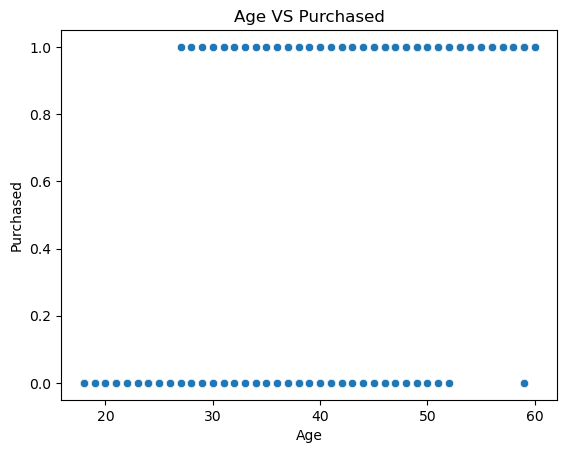

In [11]:
sns.scatterplot(x='Age',y='Purchased',data=df)
plt.title('Age VS Purchased')
plt.show()

In [12]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [16]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#to normalise range of independent variables

In [18]:
model=GaussianNB()
model.fit(x_train,y_train)


GaussianNB()

In [20]:
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]


In [24]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {'{:.2f}%'.format(accuracy*100)}")

Accuracy: 90.00%


In [25]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)


confusion matrix:
 [[65  3]
 [ 7 25]]


In [27]:
class_report=classification_report(y_test,y_pred)
print(f"classification_report:\n{class_report}")

classification_report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



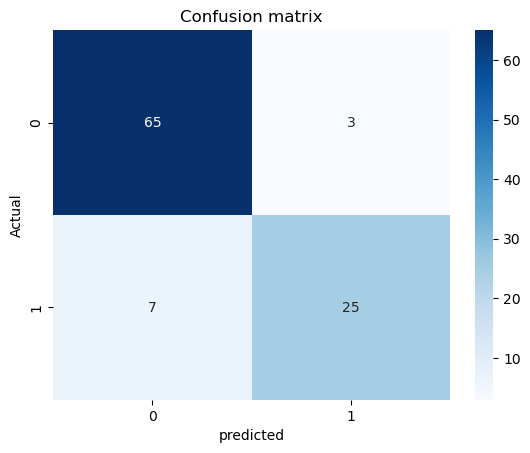

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title("Confusion matrix")
plt.show()